In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing library 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# clustering library
from sklearn.cluster import KMeans

## **LOAD DATA**

In [176]:
song_df = pd.read_csv("./dataset/spotify_tracks.csv")
song_df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


## **EXPLORASI DATA**

In [177]:
print(f"Total data : {song_df.shape[0]}")
print(f"Jumlah data kosong : {song_df.isna().sum().sum()}")
print(f"Jumlah data duplikat : {song_df.duplicated().sum()}")

Total data : 6300
Jumlah data kosong : 0
Jumlah data duplikat : 0


In [178]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


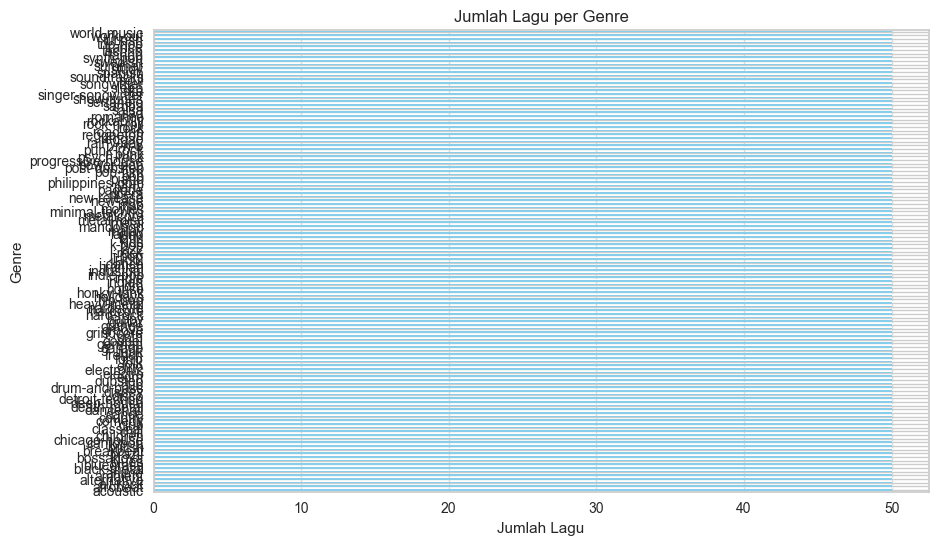

In [179]:
import matplotlib.pyplot as plt

# Menghitung jumlah genre unik
genre_counts = song_df["genre"].value_counts()

# Membuat plot horizontal
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.title("Jumlah Lagu per Genre")
plt.xlabel("Jumlah Lagu")
plt.ylabel("Genre")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [180]:
song_df["genre"].value_counts()

genre
acoustic       50
afrobeat       50
alt-rock       50
alternative    50
ambient        50
               ..
trance         50
trip-hop       50
turkish        50
work-out       50
world-music    50
Name: count, Length: 126, dtype: int64

In [181]:
song_df["explicit"].value_counts()

explicit
False    5106
True     1194
Name: count, dtype: int64

## **PREPROCESSING DATA**

In [182]:
le = LabelEncoder()
song_df["explicit"] = le.fit_transform(song_df["explicit"])

In [183]:
X = song_df.iloc[:, [5, 6]].values

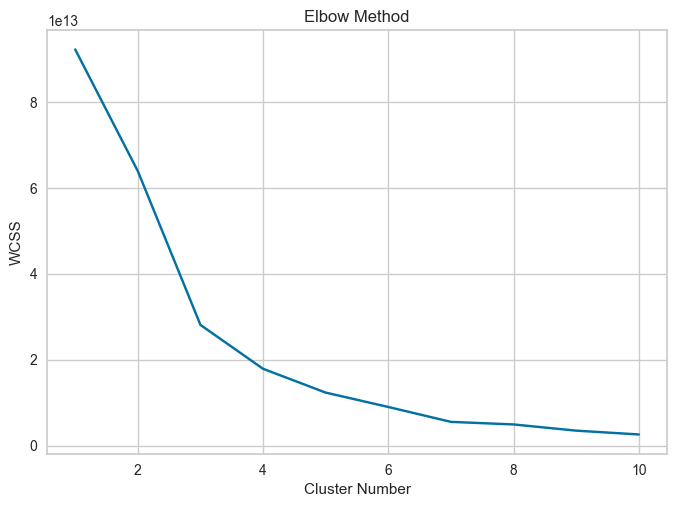

In [184]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

Elbow Method to determine the number of clusters to be formed:


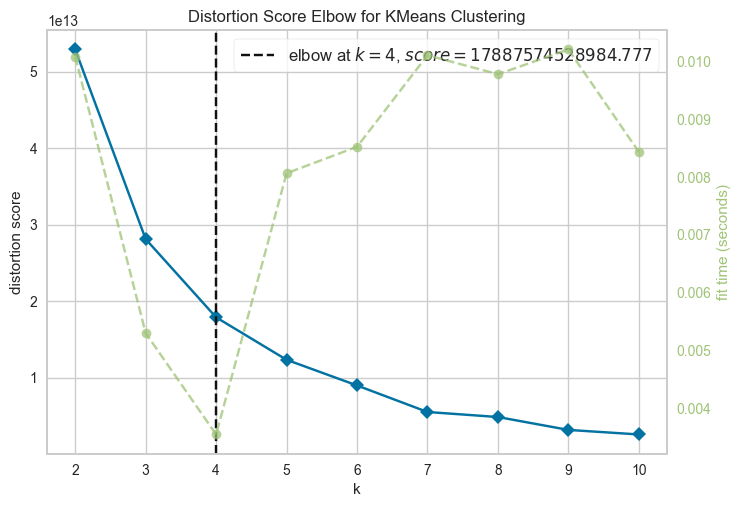

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [185]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

# **BUILD MODEL**

Text(0, 0.5, 'Second Principal Component')

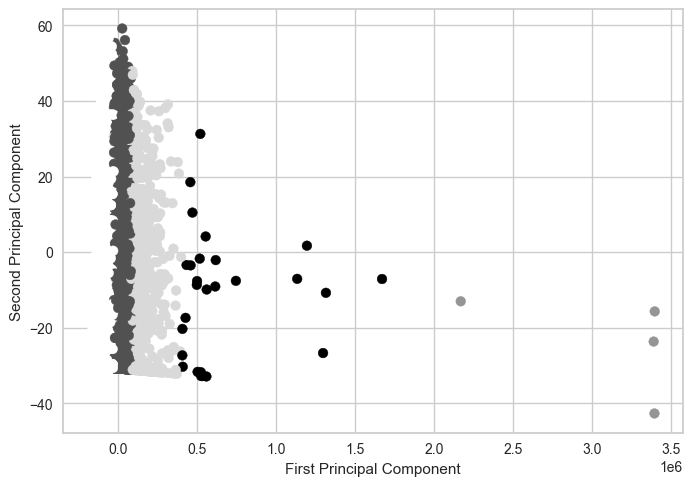

In [186]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot hasil clustering dengan data yang sudah direduksi
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

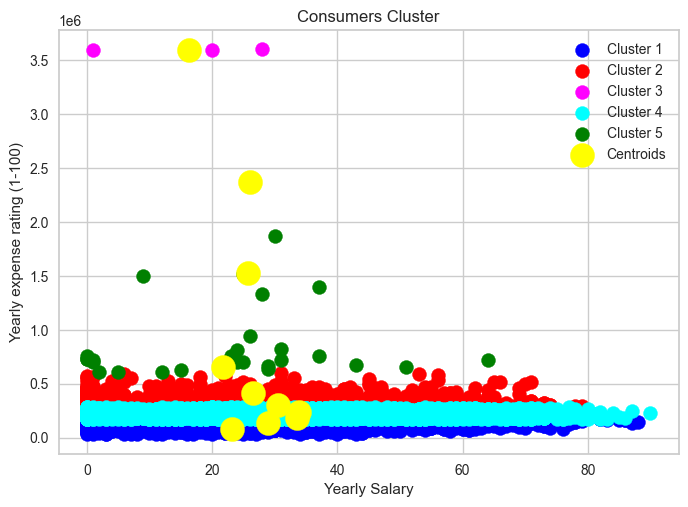

In [187]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

In [188]:
silhouette = silhouette_score(X, kmeans.labels_)
print('Silhouette Score: %.3f' % silhouette)

Silhouette Score: 0.528


Text(0, 0.5, 'Second Principal Component')

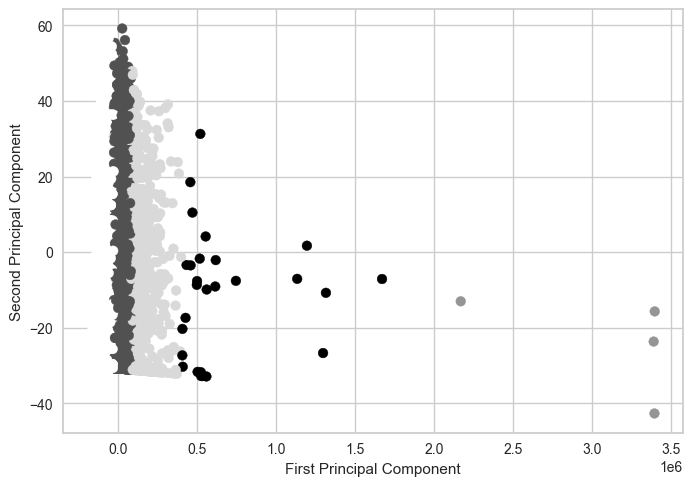

In [189]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot hasil clustering dengan data yang sudah direduksi
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

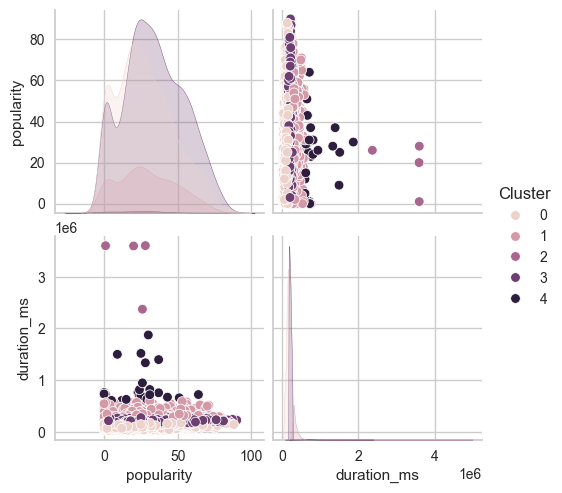

In [190]:
import seaborn as sns

# Membuat dataframe dengan semua fitur dan label cluster
df_cluster = pd.DataFrame(X, columns=['popularity',	'duration_ms'])
df_cluster['Cluster'] = y_kmeans

# Membuat pair plot
sns.pairplot(df_cluster, hue='Cluster')

Text(0, 0.5, 'Feature 2')

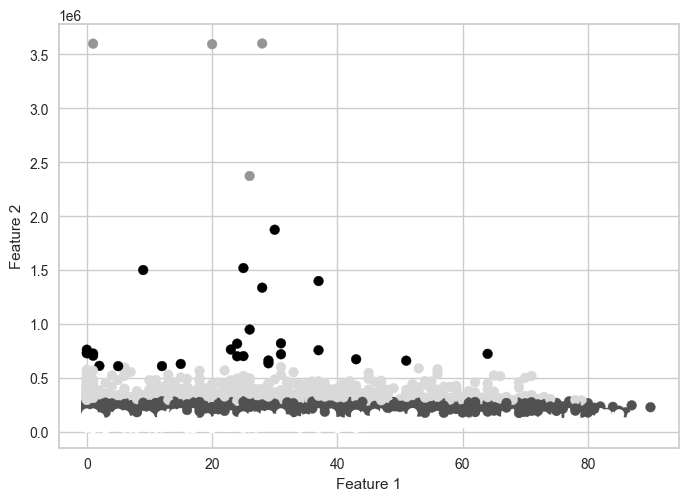

In [191]:
# Pilih 2 fitur yang ingin divisualisasikan
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

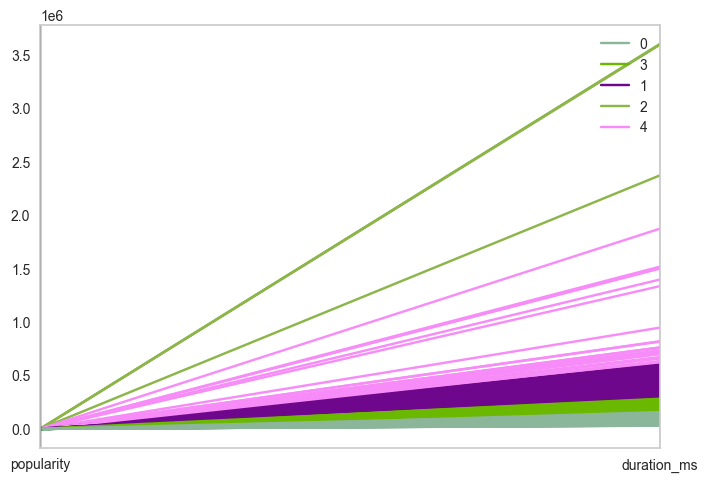

In [192]:
from pandas.plotting import parallel_coordinates

# Membuat parallel coordinates plot
parallel_coordinates(df_cluster, 'Cluster')
plt.show()

In [193]:
# from sklearn.preprocessing import StandardScaler  # atau MinMaxScaler
# import pandas as pd

# # Asumsikan data dalam DataFrame X
# features = ['popularity', 'duration_ms']

# # Menggunakan StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Atau menggunakan MinMaxScaler untuk range 0-1
# # scaler = MinMaxScaler()
# # X_scaled = scaler.fit_transform(X)

# # Konversi kembali ke DataFrame
# X_scaled_df = pd.DataFrame(X_scaled, columns=features)

In [194]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Inisialisasi scaler
scaler = StandardScaler()

# Lakukan scaling
X_scaled = scaler.fit_transform(song_df[['popularity', 'duration_ms']])

# Convert ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['popularity', 'duration_ms'])

X_scaled_df.head()

,popularity,duration_ms
0,1.365854,-0.253253
1,1.315722,-0.253228
2,0.563744,-0.479769
3,0.764272,-0.712895
4,0.112558,-0.569539


In [195]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

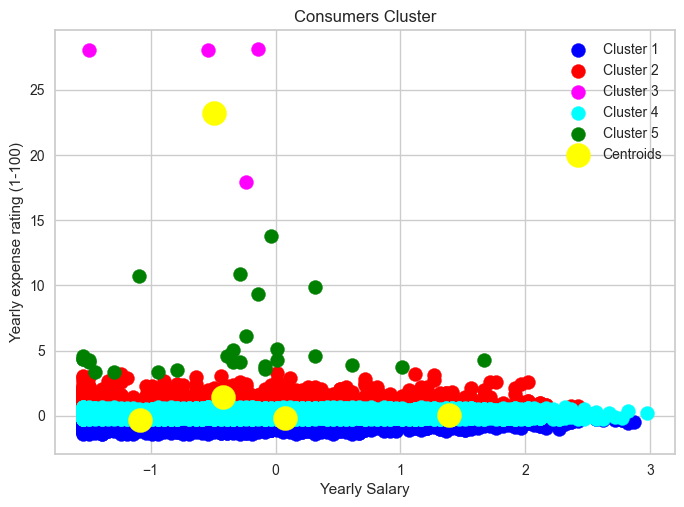

In [196]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()

Elbow Method to determine the number of clusters to be formed:


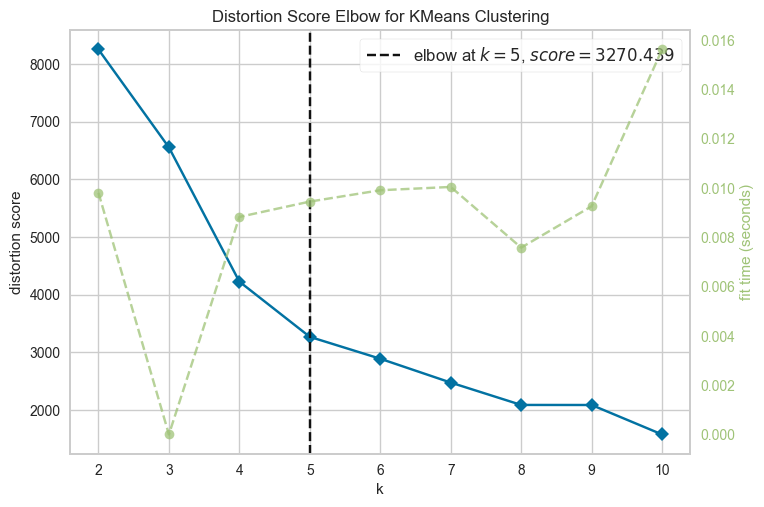

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [197]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_scaled)
Elbow_M.show()